**Quiz 06: Coin Detection**

210174X

Gallella M.M.H.H.B

ENTC


# Import required packages ;

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from skimage.feature import peak_local_max

# Import and Display the images with their dimensions;

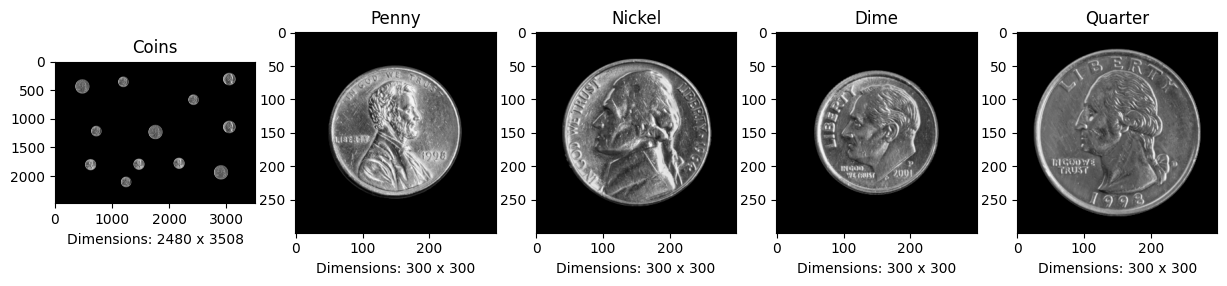

In [ ]:
coins = cv.imread("coins/coins.png", cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread("coins/Penny.png", cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread("coins/Nickel.png", cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread("coins/Dime.png", cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread("coins/Quarter.png", cv.IMREAD_GRAYSCALE)
assert q is not None

# Display the images with their dimensions;
plt.figure(figsize=(15, 15))
plt.subplot(1,5,1)
plt.imshow(coins, cmap="gray")
plt.title("Coins")
plt.xlabel(f"Dimensions: {coins.shape[0]} x {coins.shape[1]}")

plt.subplot(1,5,2)
plt.imshow(p, cmap="gray")
plt.title("Penny")
plt.xlabel(f"Dimensions: {p.shape[0]} x {p.shape[1]}")

plt.subplot(1,5,3)
plt.imshow(n, cmap="gray")
plt.title("Nickel")
plt.xlabel(f"Dimensions: {n.shape[0]} x {n.shape[1]}")

plt.subplot(1,5,4)
plt.imshow(d, cmap="gray")
plt.title("Dime")
plt.xlabel(f"Dimensions: {d.shape[0]} x {d.shape[1]}")

plt.subplot(1,5,5)
plt.imshow(q, cmap="gray")
plt.title("Quarter")
plt.xlabel(f"Dimensions: {q.shape[0]} x {q.shape[1]}")

plt.show()

# Template Matching;

Template matching is a technique in image processing used to find instances of a template image (smaller image) within a larger image. This is done by sliding the template image over the larger image (input image) and comparing the template with overlapping image regions.

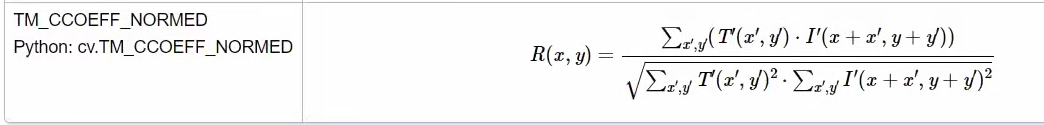

In [ ]:
# Get the template matching responses
p_response = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_response = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_response = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_response = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

## Detailed Breakdown:

1. **Template Matching**:
   - Template matching involves finding a smaller template image within a larger input image by sliding the template over the input image and comparing overlapping regions.

2. **Function `cv.matchTemplate`**:
   - The `cv.matchTemplate(image, templ, method)` function performs this sliding window comparison and generates a similarity score matrix for each template.

3. **Parameters**:
   - `coins`: The larger input image containing various coins.
   - `p`, `n`, `d`, `q`: Template images of a Penny, Nickel, Dime, and Quarter, respectively.
   - `cv.TM_CCOEFF_NORMED`: The method used for comparison, which normalizes the cross-correlation values to indicate similarity, with higher values showing a better match.

4. **Outputs**:
   - `p_response`, `n_response`, `d_response`, `q_response`: Matrices of similarity scores for each template, where higher values in the matrix indicate locations in the input image that closely match the template image.

# Visualization and Analysis of Template Matching Results

After performing template matching to detect the presence of pennies in the input image, the code visualizes the similarity scores using a grayscale image. This visualization helps in identifying where in the image the penny template matches best. Additionally, the code prints the minimum and maximum values of the similarity scores, providing a range of how well different parts of the input image match the penny template. This combination of visualization and numerical analysis helps in assessing the effectiveness of the template matching process and identifying the best match locations within the input image.

##  Penny Response visualization

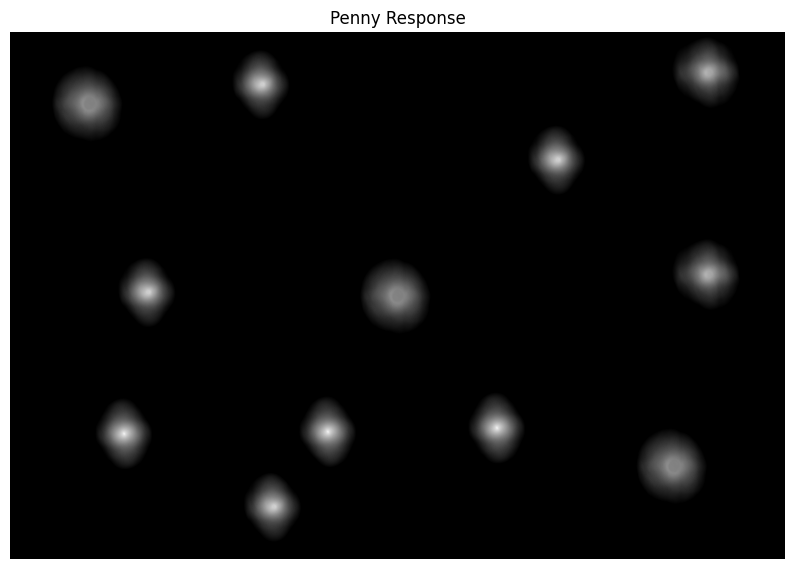

p_response.min()=-0.32741788 p_response.max()=1.0


In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(X=p_response, cmap="gray", vmin=0, vmax=1)
plt.title("Penny Response")
plt.axis("off")
plt.show()
print(f"{p_response.min()=} {p_response.max()=}")

##  Nickel Response visualization

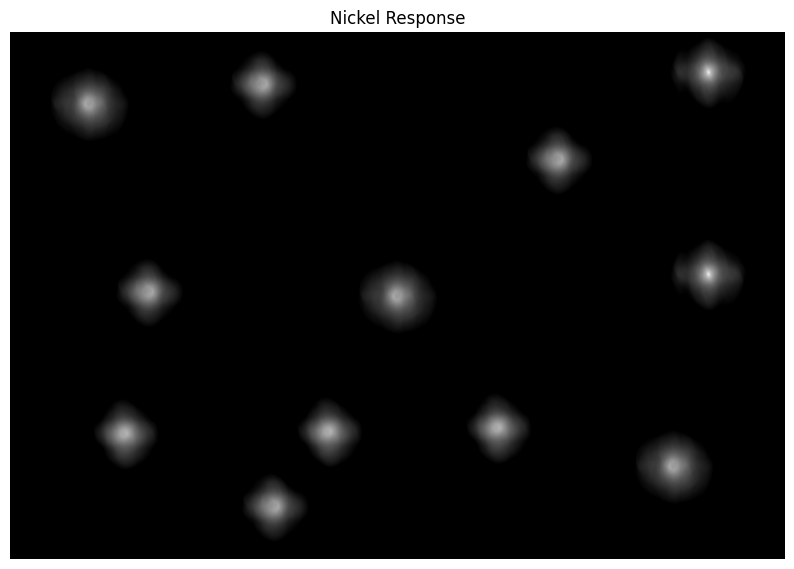

n_response.min()=-0.31852072 n_response.max()=1.0


In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(X=n_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Nickel Response")
plt.axis("off")
plt.show()
print(f"{n_response.min()=} {n_response.max()=}")

##  Dime Response visualization

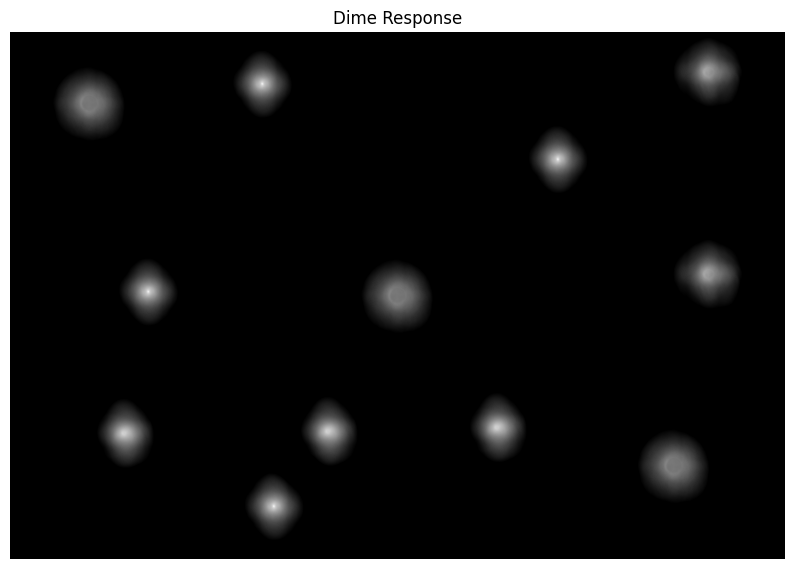

d_response.min()=-0.29990175 d_response.max()=1.0


In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(X=d_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Dime Response")
plt.axis("off")
plt.show()
print(f"{d_response.min()=} {d_response.max()=}")

##  Quarter Response visualization

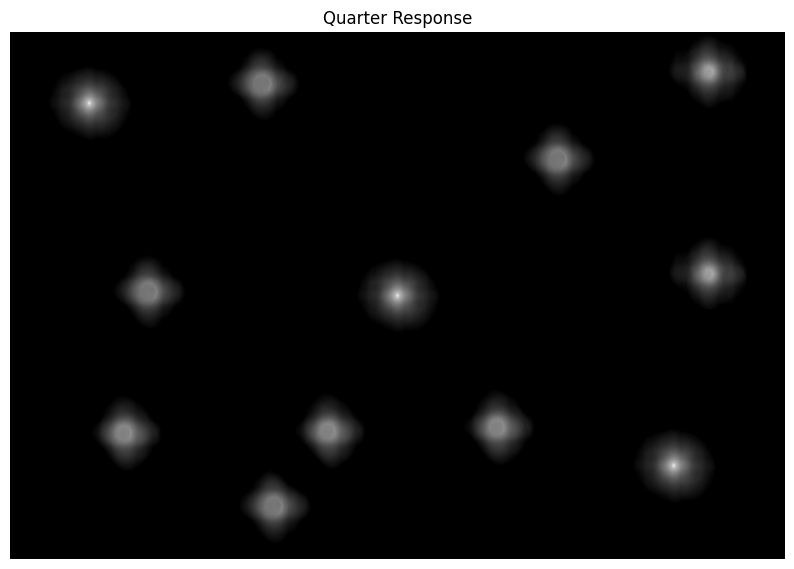

q_response.min()=-0.31779137 q_response.max()=0.9999999


In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(X=q_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Quarter Response")
plt.axis("off")
plt.show()
print(f"{q_response.min()=} {q_response.max()=}")

# Stacking Template Matching Responses

The next code block vertically stacks the similarity score matrices for each coin type (penny, nickel, dime, and quarter) along a new axis to create a combined response matrix. This stacking operation consolidates the individual response matrices into a single 3D array, where each layer along the new axis corresponds to the response for a specific coin type. This combined matrix allows for easier analysis and processing of all coin types together, facilitating further steps such as identifying the coin types in specific regions of the input image.

In [ ]:
# Vertically stack the responses along a new axis
stacked = np.stack(arrays=[p_response, n_response, d_response, q_response], axis=2)

## Let's go through a comparison of the shapes (pixel dimensions) of original coins image, p image, p_response and the stacked image

In [ ]:
coins.shape

(2480, 3508)

In [ ]:
p.shape

(300, 300)

In [ ]:
p_response.shape

(2181, 3209)

In [ ]:
stacked.shape

(2181, 3209, 4)

# Coin Detection and Visualization

In this code block, templates and their corresponding monetary values for different coins (penny, nickel, dime, and quarter) are defined. Each coin type is assigned a distinct highlight color for visualization. The input image is converted to a color image for drawing purposes. Local maxima in the stacked response matrix are found, representing potential coin locations. Each detected coin is counted, and a rectangle is drawn around it with its respective highlight color. The counts of detected coins are recorded. Additionally, a legend is created and drawn on the image to indicate which color corresponds to which coin type. Finally, the annotated image with detected coins and the legend is displayed.

[[ 166 2892    1]
 [1002 2892    1]
 [1074  572    2]
 [1638 2016    0]
 [1962 1092    2]
 [1654 1316    0]
 [1662  472    0]
 [ 214 1044    2]
 [ 294  328    3]
 [ 526 2268    2]
 [1090 1604    3]
 [1794 2748    3]]


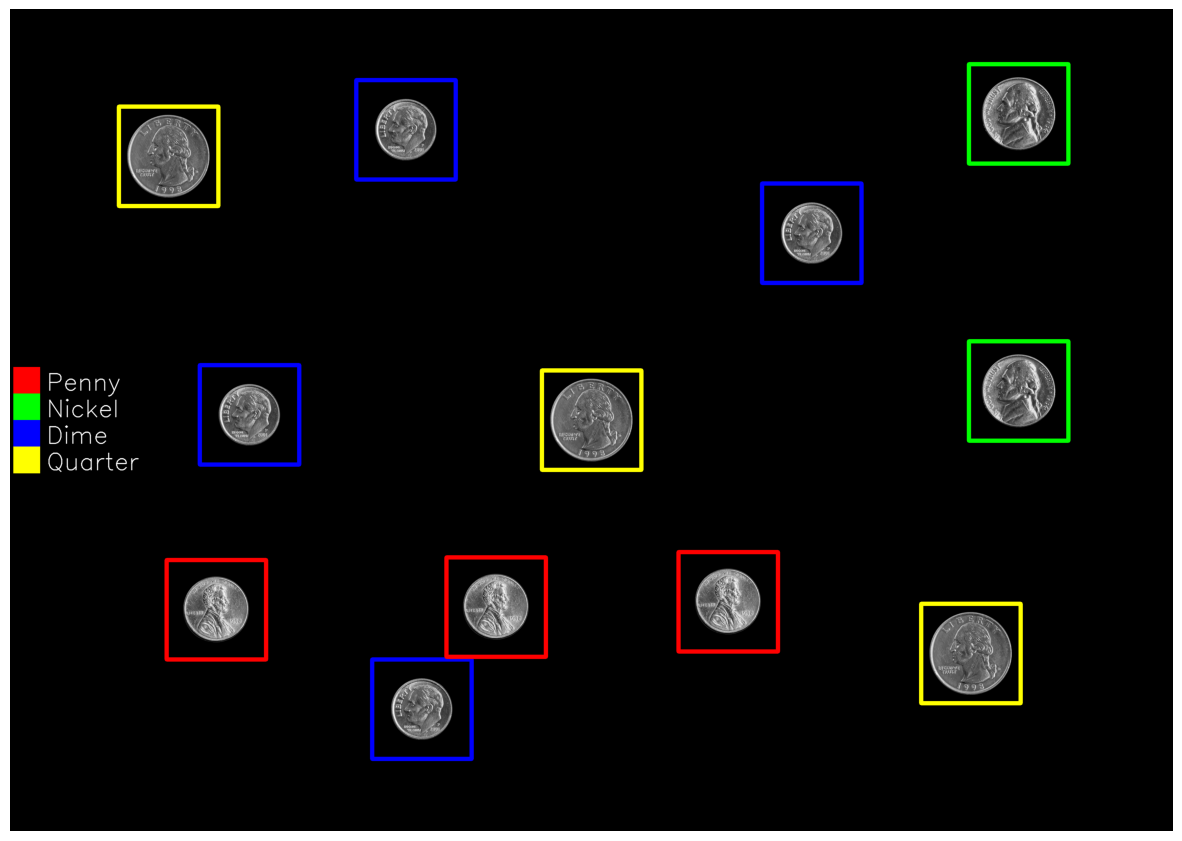

In [ ]:
# Define template images and values
templates = {
    'Penny': p,
    'Nickel': n,
    'Dime': d,
    'Quarter': q
}

# values of each coin
coin_values = {
    'Penny': 0.01,
    'Nickel': 0.05,
    'Dime': 0.10,
    'Quarter': 0.25
}

pastel_colors = [
    (255, 0, 0),    # Highlighted Red
    (0, 255, 0),    # Highlighted Green
    (0, 0, 255),    # Highlighted Blue
    (255, 255, 0)   # Highlighted Yellow
]

# Make a color image to draw on
coins_color = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)

# Find the local maxima in the stacked responses
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=5, threshold_abs=0.8)
print(coordinates)

# Initialize count dictionary
coin_counts = {name: 0 for name in templates.keys()}

# Plot on each color
for coord in coordinates:
    y, x, c = coord
    template_shape = [p.shape, n.shape, d.shape, q.shape][c]
    cv.rectangle(coins_color, (x, y), (x + template_shape[1], y + template_shape[0]), pastel_colors[c], thickness=12)

    # Increment the count for the detected coin
    coin_name = list(templates.keys())[c]
    coin_counts[coin_name] += 1

template_names = ["Penny", "Nickel", "Dime", "Quarter"]

legend_scale = 0.8
rectangle_size = 100  # Width and height of the rectangles in pixels

# Calculate the total height occupied by the legend
legend_height = int(len(template_names) * rectangle_size * legend_scale)  # Adjusted legend height based on scale

# Calculate the starting y-coordinate to vertically center the legend
start_y = (coins_color.shape[0] - legend_height) // 2

# Print a legend
for i, (name, color) in enumerate(zip(template_names, pastel_colors)):
    scaled_font_scale = legend_scale * 3  # Adjust font scale based on legend scale

    # Calculate rectangle coordinates
    rect_top_left = (10, start_y + int(rectangle_size * legend_scale * i))
    rect_bottom_right = (10 + int(rectangle_size * legend_scale), start_y + int(rectangle_size * legend_scale + rectangle_size * legend_scale * i))

    # Draw rectangle
    cv.rectangle(coins_color, rect_top_left, rect_bottom_right, color=color, thickness=-1)

    # Calculate text position
    text_x = 30 + int(rectangle_size * legend_scale)
    text_y = start_y + int(rectangle_size * legend_scale + 0.5 * rectangle_size * legend_scale * (2 * i + 1)) - int(rectangle_size/2)

    # Draw text
    cv.putText(coins_color, name, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=scaled_font_scale, color=(255, 255, 255), thickness=2, lineType=cv.LINE_AA)

plt.figure(figsize=(15, 15))
plt.imshow(coins_color)
plt.axis("off")
plt.show()


## Here is the final calculation of the total amount of money in the image with coin types and values.

| Coin Type | Value (cents) | Value (USD) | Percentage of 1 USD |
|-----------|----------------|-------------|----------------------|
| Penny     | 1              | $0.01       | 1%                   |
| Nickel    | 5              | $0.05       | 5%                   |
| Dime      | 10             | $0.10       | 10%                  |
| Quarter   | 25             | $0.25       | 25%                  |

In [ ]:
# Print coin counts and calculate total value
total_value = sum(coin_counts[coin] * coin_values[coin] for coin in coin_counts)
print("Coin Counts:", coin_counts)
print("Total Value in Dollars:", round(total_value, 2),"USD")

Coin Counts: {'Penny': 3, 'Nickel': 2, 'Dime': 4, 'Quarter': 3}
Total Value in Dollars: 1.28 USD
